In [31]:
import pandas as pd

# Step 1: Data Preparation
# Load your dataset into a variable 'data'
data = pd.read_csv('/content/sample_data/Pre-Registration Summary for Moudud.csv')  # Replace 'your_dataset.csv' with the actual path to your dataset

# Extract relevant date features from the "Date" column
data['Date'] = pd.to_datetime(data['Date'])  # Convert "Date" to datetime type
data


,Date,Day Total,Month Total
0,2016-03-23,356,90434
1,2016-03-24,7921,90434
2,2016-03-27,24640,90434
3,2016-03-28,53740,90434
4,2016-03-29,2123,90434
...,...,...,...
1764,2023-09-13,243,3654
1765,2023-09-14,322,3654
1766,2023-09-17,338,3654
1767,2023-09-18,344,3654


In [32]:
# Delete the first 347 rows
data = data.iloc[347:]

# Reset the index after deleting rows
data.reset_index(drop=True, inplace=True)
data


,Date,Day Total,Month Total
0,2018-01-02,937,17664
1,2018-01-03,856,17664
2,2018-01-04,756,17664
3,2018-01-06,13,17664
4,2018-01-07,793,17664
...,...,...,...
1417,2023-09-13,243,3654
1418,2023-09-14,322,3654
1419,2023-09-17,338,3654
1420,2023-09-18,344,3654


In [33]:
# Define the cutoff date
cutoff_date = pd.to_datetime('8/31/2023')

# Filter the DataFrame to keep rows only before the cutoff date
data = data[data['Date'] <= cutoff_date]

# If you want to reset the index
data.reset_index(drop=True, inplace=True)
data

,Date,Day Total,Month Total
0,2018-01-02,937,17664
1,2018-01-03,856,17664
2,2018-01-04,756,17664
3,2018-01-06,13,17664
4,2018-01-07,793,17664
...,...,...,...
1404,2023-08-27,387,5954
1405,2023-08-28,393,5954
1406,2023-08-29,252,5954
1407,2023-08-30,247,5954


In [34]:
data['Year'] = data['Date'].dt.year
data


<ipython-input-34-a844fbdf328b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Date'].dt.year


,Date,Day Total,Month Total,Year
0,2018-01-02,937,17664,2018
1,2018-01-03,856,17664,2018
2,2018-01-04,756,17664,2018
3,2018-01-06,13,17664,2018
4,2018-01-07,793,17664,2018
...,...,...,...,...
1404,2023-08-27,387,5954,2023
1405,2023-08-28,393,5954,2023
1406,2023-08-29,252,5954,2023
1407,2023-08-30,247,5954,2023


In [35]:
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data

<ipython-input-35-d2d9ab6cd24d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Date'].dt.month
<ipython-input-35-d2d9ab6cd24d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Day'] = data['Date'].dt.day


,Date,Day Total,Month Total,Year,Month,Day
0,2018-01-02,937,17664,2018,1,2
1,2018-01-03,856,17664,2018,1,3
2,2018-01-04,756,17664,2018,1,4
3,2018-01-06,13,17664,2018,1,6
4,2018-01-07,793,17664,2018,1,7
...,...,...,...,...,...,...
1404,2023-08-27,387,5954,2023,8,27
1405,2023-08-28,393,5954,2023,8,28
1406,2023-08-29,252,5954,2023,8,29
1407,2023-08-30,247,5954,2023,8,30


In [36]:
# Step 2: Data Splitting
X = data[['Year', 'Month', 'Day']]  # Features
y = data['Month Total']  # Target variable

In [37]:
X

,Year,Month,Day
0,2018,1,2
1,2018,1,3
2,2018,1,4
3,2018,1,6
4,2018,1,7
...,...,...,...
1404,2023,8,27
1405,2023,8,28
1406,2023,8,29
1407,2023,8,30


In [38]:
y

0       17664
1       17664
2       17664
3       17664
4       17664
        ...  
1404     5954
1405     5954
1406     5954
1407     5954
1408     5954
Name: Month Total, Length: 1409, dtype: int64

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Random Forest Model Training
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 4: Evaluation
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Calculate evaluation metrics for regression on training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for regression on test data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training Mean Squared Error:", mse_train)
print("Training R-squared:", r2_train)
print("Test Mean Squared Error:", mse_test)
print("Test R-squared:", r2_test)

# Compare training and test performance
if mse_train < mse_test:
    print("The model is not overfitting.")
else:
    print("The model may be overfitting. Further analysis is needed.")


Training Mean Squared Error: 12134.347867258204
Training R-squared: 0.9996407786288949
Test Mean Squared Error: 48550.49480000001
Test R-squared: 0.9985737469257123
The model is not overfitting.


In [40]:
y_test_pred = rf_regressor.predict(X_test)

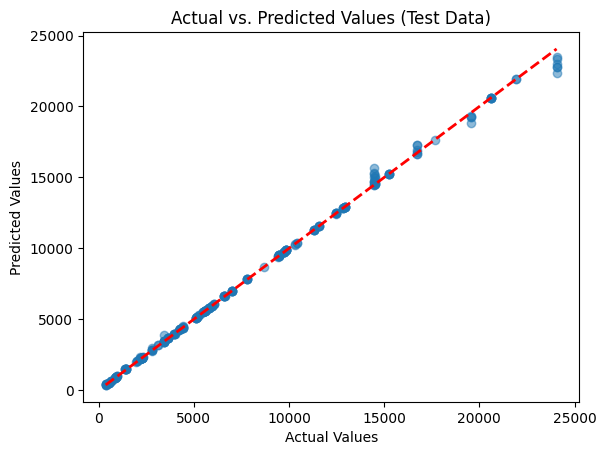

In [41]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted values on the test data
plt.scatter(y_test, y_test_pred, alpha=0.5)  # alpha is for transparency
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Test Data)")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.show()


In [42]:
import pandas as pd

# Create a DataFrame to display actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Print the DataFrame
print(results)


      Actual  Predicted
353     7016    7016.00
864      405     405.00
1310    2193    2193.00
192    14527   14717.62
782     2295    2295.00
...      ...        ...
1001    2793    2950.36
610     1464    1464.00
188    14527   14547.80
289    12860   12860.00
890     2044    2044.00

[282 rows x 2 columns]


In [43]:

single_date = {'Year': [2023], 'Month': [9], 'Day': [3]}
x_test_single = pd.DataFrame(single_date)
y_test_pred = rf_regressor.predict(x_test_single)
y_test_pred

array([5954.])

In [44]:
single_date = {'Year': [2023], 'Month': [10], 'Day': [3]}
x_test_single = pd.DataFrame(single_date)
y_test_pred = rf_regressor.predict(x_test_single)
y_test_pred

array([6121.97])

In [45]:
single_date = {'Year': [2023], 'Month': [11], 'Day': [3]}
x_test_single = pd.DataFrame(single_date)
y_test_pred = rf_regressor.predict(x_test_single)
y_test_pred

array([7474.22])

In [46]:
single_date = {'Year': [2023], 'Month': [12], 'Day': [3]}
x_test_single = pd.DataFrame(single_date)
y_test_pred = rf_regressor.predict(x_test_single)
y_test_pred

array([6242.96])

In [47]:
single_date = {'Year': [2024], 'Month': [1], 'Day': [3]}
x_test_single = pd.DataFrame(single_date)
y_test_pred = rf_regressor.predict(x_test_single)
y_test_pred

array([9513.8])

In [48]:
single_date = {'Year': [2024], 'Month': [2], 'Day': [3]}
x_test_single = pd.DataFrame(single_date)
y_test_pred = rf_regressor.predict(x_test_single)
y_test_pred

array([10327.98])